In [1]:
import numpy as np
import matplotlib.pyplot as plt

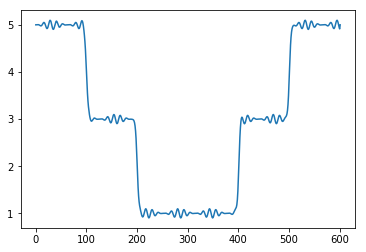

In [8]:
# Diffusion function
g = lambda s: 1/(1+s**2)

# Test function
def f(x, alpha):
    first = 5-np.tanh(alpha*(x-1))-np.tanh(alpha*(x-2))
    second = np.tanh(alpha*(x-4)) + np.tanh(alpha*(x-5)) + 0.1*(np.sin(5*x))**2*np.sin(50*x)
    return first+second

# Create random 1D function
def generate_random1D(M):
    I = np.zeros(M+2)
    s = (M + 2)//5
    for i in range(5):
        I[i*s:(i+1)*s+1] = 10*np.random.randint(1, 5)
        
    # Add noise to interior points
    I[1:-1] = I[1:-1] + np.random.normal(0, 2, size = M)
    return I

# Spatial discretization
M = 600
dx = 1/(M+1)

# Number of iteratinos, adn timestep
T = 1000
dt = 1e-8

r = dt/(2*dx**2)

np.random.seed(42)
I = generate_random1D(M)

# Initiate grid
U = np.zeros((T, M + 2))
U[0] = f(np.linspace(0, 6, M+2), 30)
# U[0] = I
U[:, 0] = U[0,0]
U[:, -1] = U[0, 1]

plt.plot(U[0])
plt.show()

# Differentiation matrix
Dx = -1 * np.eye(M+2, k = -1) + np.eye(M+2, k = 1)
Dx[0, :2] = [-2, 2]
Dx[-1, -2:] = [-2, 2]
Dx /= dx

# Construction Matrices
Ξ = np.eye(M, M+2, k = 0) + np.eye(M, M+2, k = 1)
Ω = - np.eye(M, M+2, k = 0) - 2 * np.eye(M, M+2, k = 1) - np.eye(M, M+2, k = 2)
Γ = np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)
ID = np.eye(M, M+2, k = 1)

## Explicit, Forward Euler

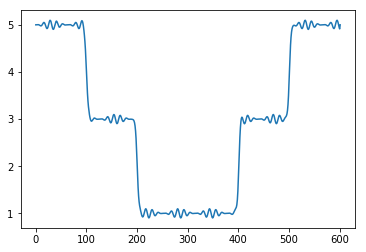

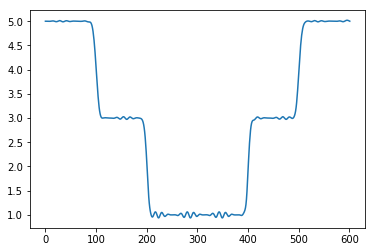

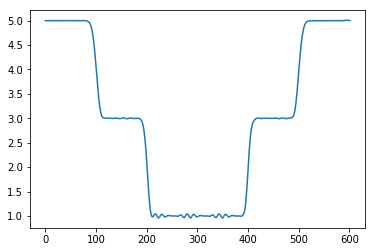

In [9]:
A = np.zeros((M, M+2))
for i in range(T-1):
    G = g(Dx.dot(U[i])**2)
    γ = Γ.dot(U[i])
    ω = Ω.dot(U[i])
    ξ = Ξ.dot(U[i])
    for j in range(M):
        A[j, j:j+3] = [ξ[j], ω[j], γ[j]]
    U[i+1, 1:-1] = U[i, 1:-1] + r * A.dot(U[i])

plt.figure()
plt.plot(U[0])

plt.figure()
plt.plot(U[T//2])

plt.figure()
plt.plot(U[-1])
plt.show()

##  Implicit

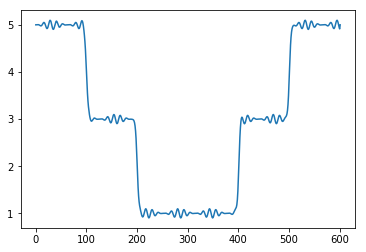

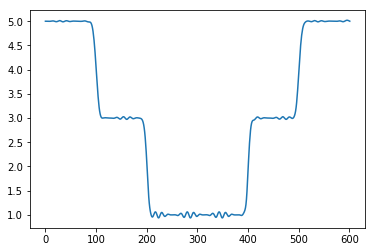

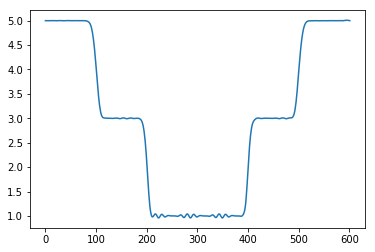

In [13]:
T = 1000
dt = 0.1

A = np.zeros((M+2, M+2))
for i in range(T-1):
    G = g(Dx.dot(U[i])**2)
    γ = Γ.dot(U[i])
    ω = Ω.dot(U[i])
    ξ = Ξ.dot(U[i])
    for j in range(1, M+1):
        A[j, j-1:j+2] = [ξ[j-1], ω[j-1], γ[j-1]]
    
    U[i+1] = np.linalg.solve(np.identity(M+2) - r * A, U[i])

plt.figure()
plt.plot(U[0])

plt.figure()
plt.plot(U[T//2])

plt.figure()
plt.plot(U[-1])
plt.show()